In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
print(f'data shape:{cancer.data.shape},\ntarget shape: {cancer.target.shape},\nFeature names: {cancer.feature_names},\nTarget names: {cancer.target_names}')

data shape:(569, 30),
target shape: (569,),
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'],
Target names: ['malignant' 'benign']


In [40]:
# print(cancer['DESCR'])

## Setting data into DataFrame

In [86]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['target'])

In [87]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Merge X and y dataset

In [88]:
df = X.merge(y, on=X.index)
df = df.drop(['key_0'], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## PCA Visualization

### 1. Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_X = scaler.fit_transform(X)
scale_X = pd.DataFrame(scale_X, columns=cancer.feature_names)
scale_X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


### 2. import PCA

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(scale_X)

PCA(n_components=4)

- transform data to its first 2 principle components

In [154]:
X_pca = pca.transform(scale_X)
print(f'Scale X shape: {scale_X.shape}\nPCA X shape: {X_pca.shape}')

Scale X shape: (569, 30)
PCA X shape: (569, 4)


- lets plot the data

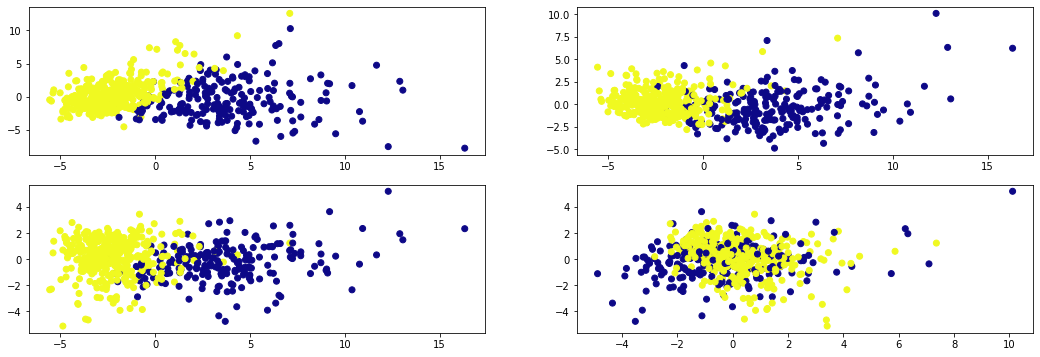

In [168]:
plt.figure(figsize=(18,6))

plt.subplot(221)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer.target, cmap='plasma')

plt.subplot(222)
plt.scatter(X_pca[:,0], X_pca[:,2], c=cancer.target, cmap='plasma')

plt.subplot(223)
plt.scatter(X_pca[:,0], X_pca[:,3], c=cancer.target, cmap='plasma')

plt.subplot(224)
plt.scatter(X_pca[:,2], X_pca[:,3], c=cancer.target, cmap='plasma')

# plt.xlabel('First Principle Component')
# plt.ylabel('Second Principle Component')

plt.show()

### 3. Interpreting the components

With great power of dimensionality reduction, come to the cost of <b>NOT</b> being able to easily understand what these components represent. 

In [156]:
# value indicate the weight for each components (features)
pca.components_, pca.components_.shape

(array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
          0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
          0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
          0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
          0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
          0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
        [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
          0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
         -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
          0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
         -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
          0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
        [-0.00853125,  0.06454989, -0.00931423,  0.02869952, -0.10429193,
         -0.07409156,  0.00273384, -

Each row represents a principle component and each column relates back to the original features. We can build heatmap to visualize the relationship

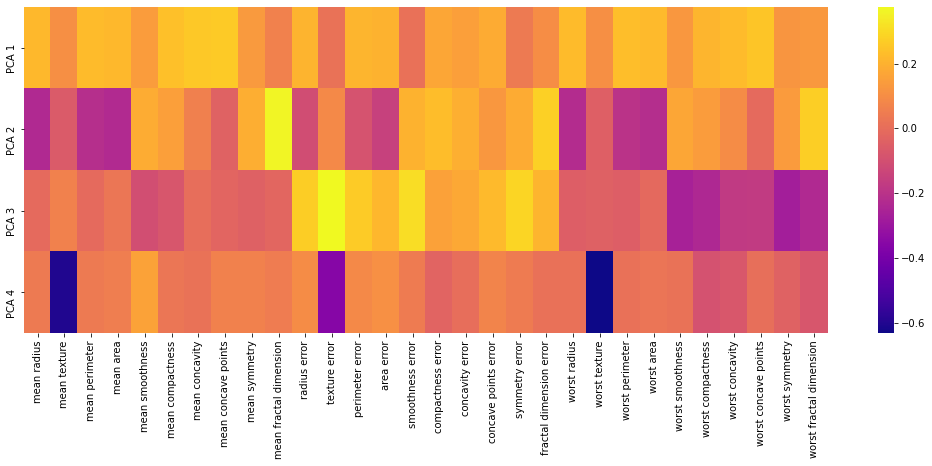

In [169]:
plt.figure(figsize=(18,6))
sns.heatmap(pca.components_, yticklabels=['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'], xticklabels=cancer.feature_names, cmap='plasma')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


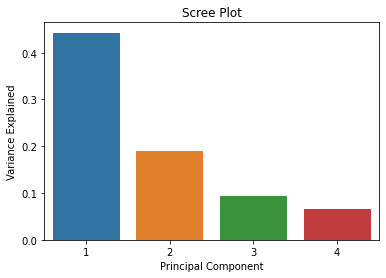

In [170]:
PC_values = np.arange(pca.n_components_)+1
sns.barplot(PC_values, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()